In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
%matplotlib notebook

In [2]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.get_device_properties(torch.cuda.device))
available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
available_gpus

1.11.0+cu113
11.3
_CudaDeviceProperties(name='NVIDIA GeForce RTX 3080 Ti', major=8, minor=6, total_memory=12288MB, multi_processor_count=80)


In [3]:
signal_train = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Train/train_data.csv", header=None) 
label_train = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Train/train_labels.csv", header=None) 

In [4]:
print(signal_train.shape)
print(label_train.shape)

(520000, 1024)
(520000, 1)


In [5]:
print(signal_train.shape)

(520000, 1024)


In [6]:
signal_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,6.9697+15.344i,21.807+11.227i,-3.785-12.698i,14.564+7.5447i,8.9981-2.6308i,-1.215-15.71i,5.3059-4.355i,3.2887-4.3774i,0.93948-0.88911i,-0.22779+2.6842i,...,-5.5552-9.4154i,5.5528-15.126i,10.836-0.0098994i,12.263-17.157i,-4.9303+0.78911i,5.9763-3.3255i,1.1425+2.3909i,-0.036358+3.0034i,-0.082112-4.8874i,0.32386+1.1548i
1,0.30808+18.037i,3.3025+6.8171i,0.6826-2.4108i,1.0129-9.5081i,2.7342+6.0514i,10.996-4.8635i,1.8464-10.974i,-3.5017-3.7144i,0.64454-0.20339i,4.7172+0.27278i,...,-4.4748-0.92122i,1.4981-9.3548i,-11.441+10.741i,-11.371+1.4703i,0.21232-5.8624i,0.68079+0.68776i,-0.61974-6.8824i,2.5936+2.1665i,-2.8392+2.0213i,1.1511+0.39071i
2,-2.1396-14.952i,-6.8059-4.8118i,10.967-0.040235i,5.6685-10.998i,11.87-7.0647i,-3.8404+6.1478i,-4.7148-2.328i,2.6295-5.9995i,0.43856+1.529i,-3.0787+2.6705i,...,-2.1467-7.7763i,-13.818+1.0741i,-6.9142-2.6272i,-1.2182-14.526i,-10.732-0.36452i,4.0443+1.3464i,3.2943-1.5021i,-3.5033+2.5983i,0.087673+0.064363i,-1.5896-0.3987i
3,4.8539-7.0149i,-2.9951+6.846i,-1.9832-2.9702i,-1.9576-10.705i,8.1901+11.485i,-7.3159-3.7989i,8.5111+1.772i,-10.507+3.0417i,-2.3205+2.3685i,0.54667+1.8651i,...,-10.881-3.7572i,3.4602+10.945i,-5.1742+8.4358i,-3.6465-11.429i,1.1013+1.6484i,-2.7228+7.5431i,-2.0469+0.85773i,4.1051-1.798i,-1.559+1.6948i,-0.17664-0.28059i
4,11.742-0.76174i,8.3615-15.006i,4.8117+20.965i,-6.8427+6.9933i,12.676-10.134i,-0.21071+1.6142i,-1.2374+10.481i,-5.2798-8.824i,2.984+1.4124i,-2.5026+4.3698i,...,-21.366+4.3882i,14.699+9.2936i,5.1483-4.1128i,7.9936+8.5264i,-12.296+6.9191i,5.9394+2.9556i,0.29011-1.9126i,-0.35753-3.4535i,0.35814+0.93068i,0.46717-1.3934i


In [ ]:
label_train.head(26000)

In [124]:
new_train_labels = []
for k in range(0, 20):
    for i in range(k*26000, k*26000 + 26000, 1000):
        new_train_labels.append(label_train[i:i+100])

In [157]:
len(new_train_labels)

520

In [126]:
bro = np.reshape(new_train_labels, (26, 2000))
df = pd.DataFrame(bro)

In [127]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,4,4,4,4,4,4,4,4,4,4,...,21,21,21,21,21,21,21,21,21,21
1,61,61,61,61,61,61,61,61,61,61,...,0,0,0,0,0,0,0,0,0,0
2,40,40,40,40,40,40,40,40,40,40,...,34,34,34,34,34,34,34,34,34,34
3,23,23,23,23,23,23,23,23,23,23,...,14,14,14,14,14,14,14,14,14,14
4,44,44,44,44,44,44,44,44,44,44,...,31,31,31,31,31,31,31,31,31,31
5,1,1,1,1,1,1,1,1,1,1,...,10,10,10,10,10,10,10,10,10,10
6,50,50,50,50,50,50,50,50,50,50,...,3,3,3,3,3,3,3,3,3,3
7,13,13,13,13,13,13,13,13,13,13,...,32,32,32,32,32,32,32,32,32,32
8,2,2,2,2,2,2,2,2,2,2,...,41,41,41,41,41,41,41,41,41,41
9,11,11,11,11,11,11,11,11,11,11,...,20,20,20,20,20,20,20,20,20,20


In [128]:
array = df.values.reshape(52000,1)

In [129]:
df = pd.DataFrame(array)

In [130]:
df.head(201)

,0
0,4
1,4
2,4
3,4
4,4
...,...
196,14
197,14
198,14
199,14


In [131]:
df.to_csv("train_labelsv2.csv")

In [132]:
signal_train.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,6.9697+15.344i,21.807+11.227i,-3.785-12.698i,14.564+7.5447i,8.9981-2.6308i,-1.215-15.71i,5.3059-4.355i,3.2887-4.3774i,0.93948-0.88911i,-0.22779+2.6842i,...,-5.5552-9.4154i,5.5528-15.126i,10.836-0.0098994i,12.263-17.157i,-4.9303+0.78911i,5.9763-3.3255i,1.1425+2.3909i,-0.036358+3.0034i,-0.082112-4.8874i,0.32386+1.1548i
1,0.30808+18.037i,3.3025+6.8171i,0.6826-2.4108i,1.0129-9.5081i,2.7342+6.0514i,10.996-4.8635i,1.8464-10.974i,-3.5017-3.7144i,0.64454-0.20339i,4.7172+0.27278i,...,-4.4748-0.92122i,1.4981-9.3548i,-11.441+10.741i,-11.371+1.4703i,0.21232-5.8624i,0.68079+0.68776i,-0.61974-6.8824i,2.5936+2.1665i,-2.8392+2.0213i,1.1511+0.39071i
2,-2.1396-14.952i,-6.8059-4.8118i,10.967-0.040235i,5.6685-10.998i,11.87-7.0647i,-3.8404+6.1478i,-4.7148-2.328i,2.6295-5.9995i,0.43856+1.529i,-3.0787+2.6705i,...,-2.1467-7.7763i,-13.818+1.0741i,-6.9142-2.6272i,-1.2182-14.526i,-10.732-0.36452i,4.0443+1.3464i,3.2943-1.5021i,-3.5033+2.5983i,0.087673+0.064363i,-1.5896-0.3987i
3,4.8539-7.0149i,-2.9951+6.846i,-1.9832-2.9702i,-1.9576-10.705i,8.1901+11.485i,-7.3159-3.7989i,8.5111+1.772i,-10.507+3.0417i,-2.3205+2.3685i,0.54667+1.8651i,...,-10.881-3.7572i,3.4602+10.945i,-5.1742+8.4358i,-3.6465-11.429i,1.1013+1.6484i,-2.7228+7.5431i,-2.0469+0.85773i,4.1051-1.798i,-1.559+1.6948i,-0.17664-0.28059i
4,11.742-0.76174i,8.3615-15.006i,4.8117+20.965i,-6.8427+6.9933i,12.676-10.134i,-0.21071+1.6142i,-1.2374+10.481i,-5.2798-8.824i,2.984+1.4124i,-2.5026+4.3698i,...,-21.366+4.3882i,14.699+9.2936i,5.1483-4.1128i,7.9936+8.5264i,-12.296+6.9191i,5.9394+2.9556i,0.29011-1.9126i,-0.35753-3.4535i,0.35814+0.93068i,0.46717-1.3934i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.3385-6.3176i,-1.7065+22.339i,-5.3014-4.1592i,-19.512+14.953i,0.17605-9.8619i,-1.814-3.3817i,6.2788+1.9905i,-3.8464+2.5403i,6.0893-4.2677i,3.2387+1.8941i,...,23.328+6.3059i,16.261+10.28i,-11.832-3.3769i,1.8307+2.5633i,0.098909-5.2457i,1.4044+5.0436i,2.717+4.0945i,-0.08537+1.7603i,1.0359+0.35644i,0.29329-0.67566i
96,16.186-1.4985i,1.6854+17.147i,6.1624-17.607i,-9.2634-1.7138i,-10.269-13.806i,12.312+1.6979i,11.617+0.072426i,0.99488+9.7797i,0.75881+1.0406i,0.32762+0.68661i,...,-13.287-2.219i,0.22934+8.9847i,2.3989+4.3192i,-4.2186-3.4248i,0.71287+5.8336i,-1.7782+4.6205i,0.016333+3.267i,0.69727+1.0779i,-1.3569+0.93155i,0.56736-0.23644i
97,-0.36793+0.47679i,2.5922+1.2007i,-2.0159+18.038i,6.352-1.3257i,-0.48601-0.62301i,-9.7064-1.9939i,8.3141-3.959i,1.4396-2.5938i,0.23738+2.5342i,4.4432-0.93975i,...,12.5+21.507i,3.6376+11.603i,4.6556-8.4624i,-5.5428+0.85375i,-7.3113-10.104i,7.7714-1.3935i,-0.094129-0.10551i,3.7008-1.3415i,0.22995+0.30038i,-0.30127-0.277i
98,-21.263-2.4853i,8.5809-7.9054i,9.8376+15.116i,22.647-4.4421i,18.253-5.6223i,3.8495+5.0803i,-1.8025+1.0024i,3.8661-1.4556i,-1.3724-0.86188i,1.5401-0.2174i,...,-11.35-10.69i,-2.4816-14.668i,-3.2853+1.9734i,-0.15247+0.327i,3.3149-2.6566i,-0.42826+4.7701i,1.9238+2.0208i,1.3713+0.91755i,-0.051423-1.0262i,0.66787+1.3901i


In [133]:
new_signal_train = []
for k in range(0, 20):
    for i in range(k*26000, k*26000 + 26000, 1000):
        new_signal_train.append(signal_train[i:i+100])

In [134]:
new_signal_train[0].shape

(100, 1024)

In [136]:
bro2 = np.reshape(new_signal_train, (52000, 1024))
df = pd.DataFrame(bro2)

In [137]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,6.9697+15.344i,21.807+11.227i,-3.785-12.698i,14.564+7.5447i,8.9981-2.6308i,-1.215-15.71i,5.3059-4.355i,3.2887-4.3774i,0.93948-0.88911i,-0.22779+2.6842i,...,-5.5552-9.4154i,5.5528-15.126i,10.836-0.0098994i,12.263-17.157i,-4.9303+0.78911i,5.9763-3.3255i,1.1425+2.3909i,-0.036358+3.0034i,-0.082112-4.8874i,0.32386+1.1548i
1,0.30808+18.037i,3.3025+6.8171i,0.6826-2.4108i,1.0129-9.5081i,2.7342+6.0514i,10.996-4.8635i,1.8464-10.974i,-3.5017-3.7144i,0.64454-0.20339i,4.7172+0.27278i,...,-4.4748-0.92122i,1.4981-9.3548i,-11.441+10.741i,-11.371+1.4703i,0.21232-5.8624i,0.68079+0.68776i,-0.61974-6.8824i,2.5936+2.1665i,-2.8392+2.0213i,1.1511+0.39071i
2,-2.1396-14.952i,-6.8059-4.8118i,10.967-0.040235i,5.6685-10.998i,11.87-7.0647i,-3.8404+6.1478i,-4.7148-2.328i,2.6295-5.9995i,0.43856+1.529i,-3.0787+2.6705i,...,-2.1467-7.7763i,-13.818+1.0741i,-6.9142-2.6272i,-1.2182-14.526i,-10.732-0.36452i,4.0443+1.3464i,3.2943-1.5021i,-3.5033+2.5983i,0.087673+0.064363i,-1.5896-0.3987i
3,4.8539-7.0149i,-2.9951+6.846i,-1.9832-2.9702i,-1.9576-10.705i,8.1901+11.485i,-7.3159-3.7989i,8.5111+1.772i,-10.507+3.0417i,-2.3205+2.3685i,0.54667+1.8651i,...,-10.881-3.7572i,3.4602+10.945i,-5.1742+8.4358i,-3.6465-11.429i,1.1013+1.6484i,-2.7228+7.5431i,-2.0469+0.85773i,4.1051-1.798i,-1.559+1.6948i,-0.17664-0.28059i
4,11.742-0.76174i,8.3615-15.006i,4.8117+20.965i,-6.8427+6.9933i,12.676-10.134i,-0.21071+1.6142i,-1.2374+10.481i,-5.2798-8.824i,2.984+1.4124i,-2.5026+4.3698i,...,-21.366+4.3882i,14.699+9.2936i,5.1483-4.1128i,7.9936+8.5264i,-12.296+6.9191i,5.9394+2.9556i,0.29011-1.9126i,-0.35753-3.4535i,0.35814+0.93068i,0.46717-1.3934i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.3385-6.3176i,-1.7065+22.339i,-5.3014-4.1592i,-19.512+14.953i,0.17605-9.8619i,-1.814-3.3817i,6.2788+1.9905i,-3.8464+2.5403i,6.0893-4.2677i,3.2387+1.8941i,...,23.328+6.3059i,16.261+10.28i,-11.832-3.3769i,1.8307+2.5633i,0.098909-5.2457i,1.4044+5.0436i,2.717+4.0945i,-0.08537+1.7603i,1.0359+0.35644i,0.29329-0.67566i
96,16.186-1.4985i,1.6854+17.147i,6.1624-17.607i,-9.2634-1.7138i,-10.269-13.806i,12.312+1.6979i,11.617+0.072426i,0.99488+9.7797i,0.75881+1.0406i,0.32762+0.68661i,...,-13.287-2.219i,0.22934+8.9847i,2.3989+4.3192i,-4.2186-3.4248i,0.71287+5.8336i,-1.7782+4.6205i,0.016333+3.267i,0.69727+1.0779i,-1.3569+0.93155i,0.56736-0.23644i
97,-0.36793+0.47679i,2.5922+1.2007i,-2.0159+18.038i,6.352-1.3257i,-0.48601-0.62301i,-9.7064-1.9939i,8.3141-3.959i,1.4396-2.5938i,0.23738+2.5342i,4.4432-0.93975i,...,12.5+21.507i,3.6376+11.603i,4.6556-8.4624i,-5.5428+0.85375i,-7.3113-10.104i,7.7714-1.3935i,-0.094129-0.10551i,3.7008-1.3415i,0.22995+0.30038i,-0.30127-0.277i
98,-21.263-2.4853i,8.5809-7.9054i,9.8376+15.116i,22.647-4.4421i,18.253-5.6223i,3.8495+5.0803i,-1.8025+1.0024i,3.8661-1.4556i,-1.3724-0.86188i,1.5401-0.2174i,...,-11.35-10.69i,-2.4816-14.668i,-3.2853+1.9734i,-0.15247+0.327i,3.3149-2.6566i,-0.42826+4.7701i,1.9238+2.0208i,1.3713+0.91755i,-0.051423-1.0262i,0.66787+1.3901i


In [138]:
df.to_csv("signal_trainv2.csv")

In [121]:
unique, counts = np.unique(new_train_labels, return_counts=True)

(520000, 1)


<IPython.core.display.Javascript object>


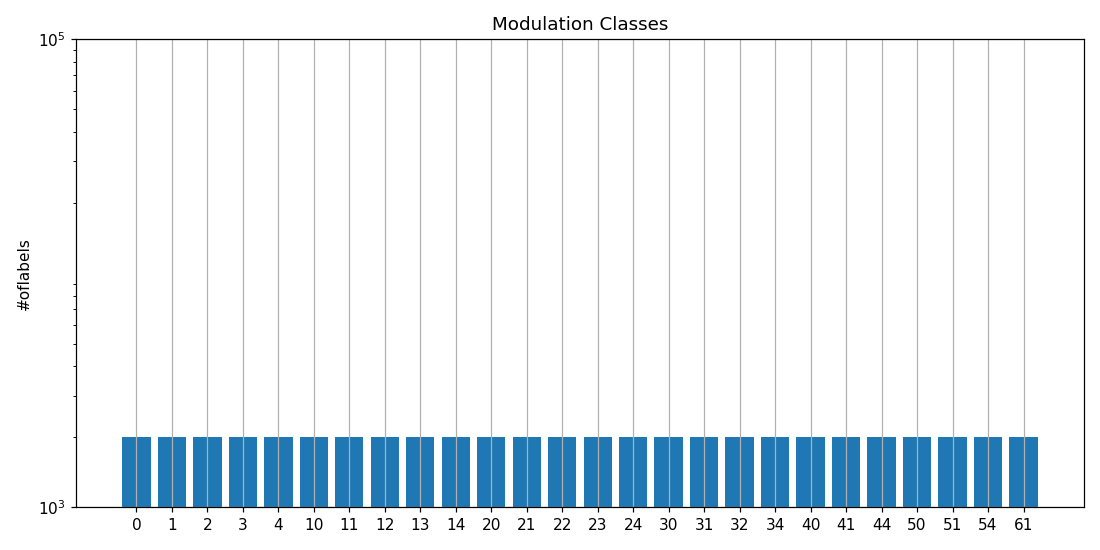

In [122]:
alllabel = label_train
print(alllabel.shape)

#d_values, d_index = np.histogram(alllabel)
d_index = np.arange(1, 27, 1)
#print(d_values.shape)
#print(d_index.shape)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(d_index, counts)
ax.set_xticks(d_index)
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_yscale('log')
ax.set_yticks([1e3, 1e5, 1e7])
ax.set_ylim(1e3,1e5)
ax.set_title(f"Modulation Classes")
ax.set_ylabel("#oflabels")
ax.set_xticklabels(unique)

fig.tight_layout()

In [123]:
counts

array([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000], dtype=int64)

In [55]:
signal_test = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Test/test_data.csv", header=None)
label_test = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Test/test_labels.csv", header=None)

In [56]:
print(signal_test.shape)
print(label_test.shape)

(260000, 1024)
(260000, 1)


In [198]:
new_test_labels = []
for k in range(0, 20):
    for i in range(k*13000, 13000*k+13000, 500):
        new_test_labels.append(label_test[i:i+25])

In [199]:
len(new_test_labels)

520

In [200]:
bro = np.reshape(new_train_labels, (26, 2000))
df = pd.DataFrame(bro)

In [201]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,4,4,4,4,4,4,4,4,4,4,...,21,21,21,21,21,21,21,21,21,21
1,61,61,61,61,61,61,61,61,61,61,...,0,0,0,0,0,0,0,0,0,0
2,40,40,40,40,40,40,40,40,40,40,...,34,34,34,34,34,34,34,34,34,34
3,23,23,23,23,23,23,23,23,23,23,...,14,14,14,14,14,14,14,14,14,14
4,44,44,44,44,44,44,44,44,44,44,...,31,31,31,31,31,31,31,31,31,31
5,1,1,1,1,1,1,1,1,1,1,...,10,10,10,10,10,10,10,10,10,10
6,50,50,50,50,50,50,50,50,50,50,...,3,3,3,3,3,3,3,3,3,3
7,13,13,13,13,13,13,13,13,13,13,...,32,32,32,32,32,32,32,32,32,32
8,2,2,2,2,2,2,2,2,2,2,...,41,41,41,41,41,41,41,41,41,41
9,11,11,11,11,11,11,11,11,11,11,...,20,20,20,20,20,20,20,20,20,20


In [202]:
array = df.values.reshape(52000,1)

In [203]:
df = pd.DataFrame(array)

In [204]:
df.head(101)

,0
0,4
1,4
2,4
3,4
4,4
...,...
96,4
97,4
98,4
99,4


In [205]:
unique, counts = np.unique(new_test_labels, return_counts=True)
print(counts)

[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500]


(520000, 1)


<IPython.core.display.Javascript object>


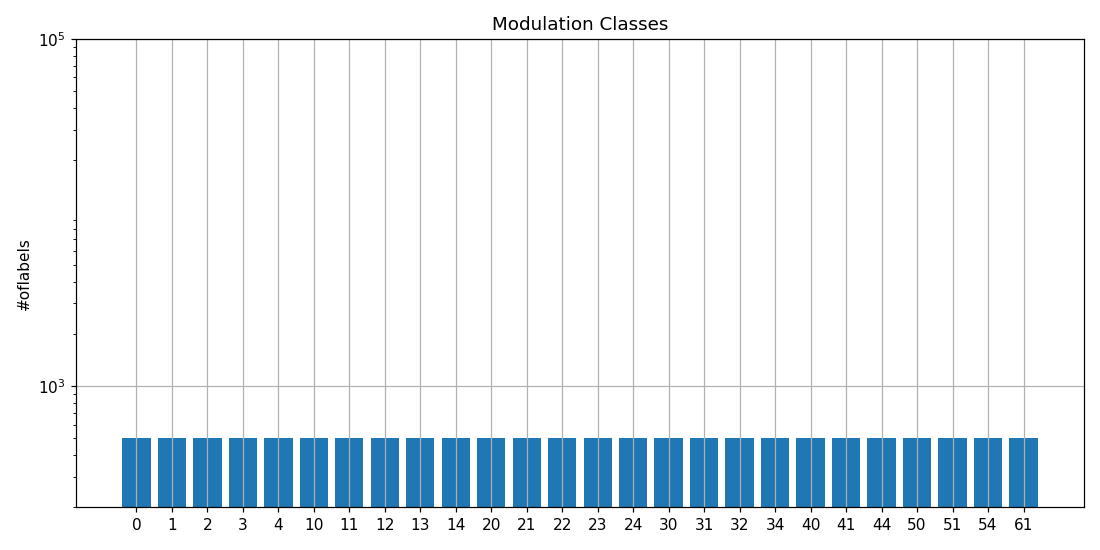

In [207]:
alllabel = label_train
print(alllabel.shape)

d_index = np.arange(1, 27, 1)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(d_index, counts)
ax.set_xticks(d_index)
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_yscale('log')
ax.set_yticks([1e3, 1e5, 1e7])
ax.set_ylim(200,1e5)
ax.set_title(f"Modulation Classes")
ax.set_ylabel("#oflabels")
ax.set_xticklabels(unique)

fig.tight_layout()

In [208]:
df.to_csv("test_labelsv2.csv")

In [209]:
new_signal_test = []
for k in range(0, 20):
    for i in range(k*13000, k*13000 + 13000, 500):
        new_signal_test.append(signal_test[i:i+25])

In [210]:
new_signal_test[0].shape

(25, 1024)

In [212]:
bro2 = np.reshape(new_signal_test, (13000, 1024))
df = pd.DataFrame(bro2)

In [213]:
df.to_csv("signal_testv2.csv")

In [74]:
snr_train = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Train/train_snr.csv", header=None)
snr_test = pd.read_csv("HisarMod2019.1/HisarMod2019.1/Test/test_snr.csv", header=None) 

In [75]:
print(snr_train.shape)
print(snr_test.shape)

(520000, 1)
(260000, 1)


In [141]:
snr_test.head(13001)

,0
0,-20
1,-20
2,-20
3,-20
4,-20
...,...
12996,-20
12997,-20
12998,-20
12999,-20


In [224]:
snr_train.head(26001)

,0
0,-20
1,-20
2,-20
3,-20
4,-20
...,...
25996,-20
25997,-20
25998,-20
25999,-20


In [255]:
new_snr_train = []
for i in range(0, 520000, 26000):
    new_snr_train.append(snr_train[i:i+100])

In [256]:
bro = np.reshape(new_snr_train, (20, 100))
df = pd.DataFrame(bro)

In [257]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,...,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20
1,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,...,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18
2,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,...,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16
3,-14,-14,-14,-14,-14,-14,-14,-14,-14,-14,...,-14,-14,-14,-14,-14,-14,-14,-14,-14,-14
4,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,...,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
5,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
6,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
7,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
8,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [258]:
array = df.values.reshape(2000,1)

In [259]:
df = pd.DataFrame(array)

In [260]:
df.head(100)

,0
0,-20
1,-20
2,-20
3,-20
4,-20
...,...
95,-20
96,-20
97,-20
98,-20


In [261]:
unique, counts = np.unique(new_snr_train, return_counts=True)
print(counts)

[100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100]


(520000, 1)


<IPython.core.display.Javascript object>


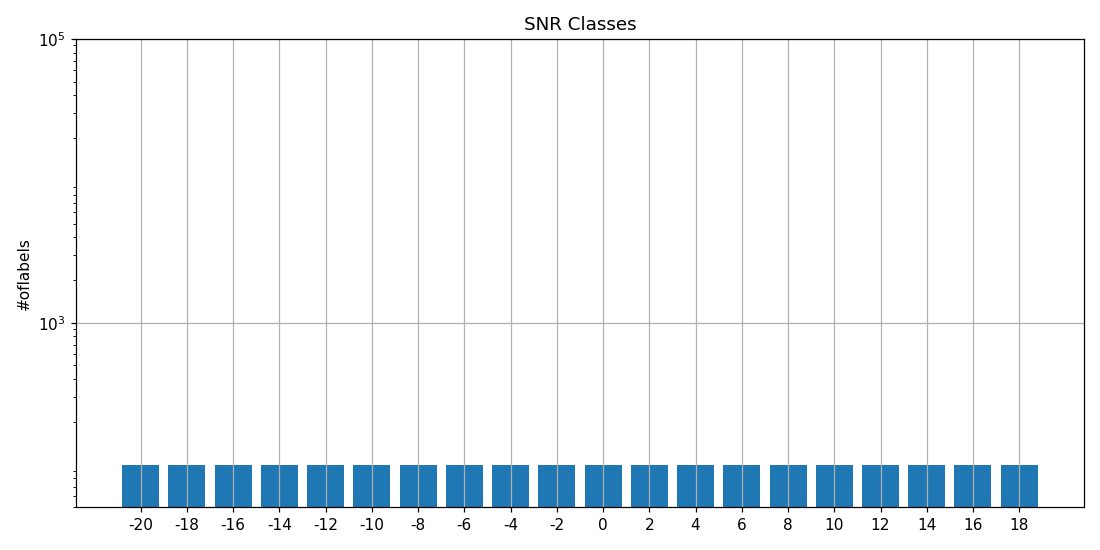

In [262]:
alllabel = snr_train
print(alllabel.shape)

d_index = np.arange(1, 21, 1)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(d_index, counts)
ax.set_xticks(d_index)
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_yscale('log')
ax.set_yticks([1e3, 1e5, 1e7])
ax.set_ylim(50,1e5)
ax.set_title(f"SNR Classes")
ax.set_ylabel("#oflabels")
ax.set_xticklabels(unique)

fig.tight_layout()

In [263]:
df.to_csv("snr_trainv2.csv")

In [264]:
new_snr_test = []
for i in range(0, 260000, 13000):
    new_snr_test.append(snr_test[i:i+100])

In [265]:
bro = np.reshape(new_snr_test, (20, 100))
df = pd.DataFrame(bro)

In [266]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,...,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20
1,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,...,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18
2,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,...,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16
3,-14,-14,-14,-14,-14,-14,-14,-14,-14,-14,...,-14,-14,-14,-14,-14,-14,-14,-14,-14,-14
4,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12,...,-12,-12,-12,-12,-12,-12,-12,-12,-12,-12
5,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
6,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
7,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
8,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [267]:
array = df.values.reshape(2000,1)

In [268]:
df = pd.DataFrame(array)

In [269]:
df.head(100)

,0
0,-20
1,-20
2,-20
3,-20
4,-20
...,...
95,-20
96,-20
97,-20
98,-20


In [270]:
unique, counts = np.unique(new_snr_test, return_counts=True)
print(counts)

[100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100]


(520000, 1)


<IPython.core.display.Javascript object>


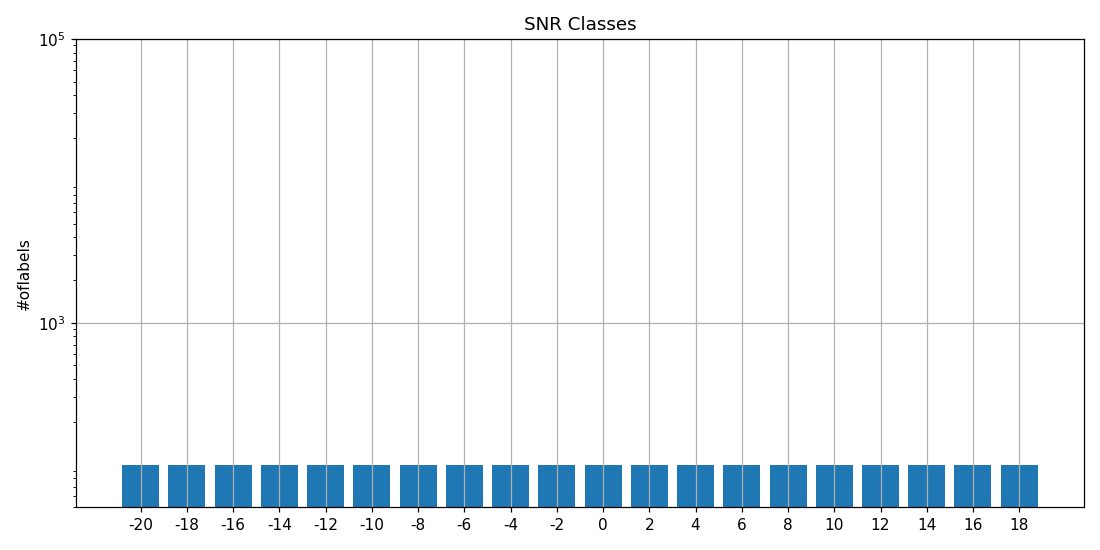

In [271]:
alllabel = snr_train
print(alllabel.shape)

d_index = np.arange(1, 21, 1)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(d_index, counts)
ax.set_xticks(d_index)
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_yscale('log')
ax.set_yticks([1e3, 1e5, 1e7])
ax.set_ylim(50,1e5)
ax.set_title(f"SNR Classes")
ax.set_ylabel("#oflabels")
ax.set_xticklabels(unique)

fig.tight_layout()

In [272]:
df.to_csv("snr_testv2.csv")